In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import datetime
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import seaborn as sns



%matplotlib inline

df = pd.read_csv('Documents/Police Shooting data.csv', encoding='latin-1' )
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [231]:
#First I want to explore the data
df.shape

(4453, 14)

In [232]:
#columns with missing data
NullColumns = set(df.columns[np.sum(df.isnull()) == 0])

In [233]:
NullColumns

{'body_camera',
 'city',
 'date',
 'id',
 'manner_of_death',
 'name',
 'signs_of_mental_illness',
 'state',
 'threat_level'}

In [234]:
#what percent of rows are missing for each column?
np.sum(df.isnull())/df.shape[0]*100

id                         0.000000
name                       0.000000
date                       0.000000
manner_of_death            0.000000
armed                      5.569279
age                        3.772737
gender                     0.089827
race                       8.309005
city                       0.000000
state                      0.000000
signs_of_mental_illness    0.000000
threat_level               0.000000
flee                       3.974848
body_camera                0.000000
dtype: float64

In [235]:
#Adding year column to data based on date column
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015


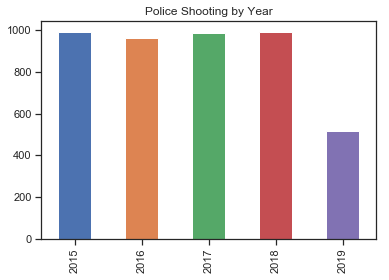

In [236]:
#Police Shootings by year
year_vals = df.year.value_counts().sort_index()

(year_vals).plot(kind="bar");
plt.title("Police Shooting by Year");

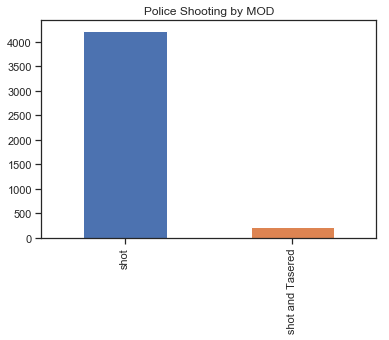

In [237]:
#Seeing what is in manner of death column.
MOD_vals = df.manner_of_death.value_counts().sort_index()

(MOD_vals).plot(kind="bar");
plt.title("Police Shooting by MOD");

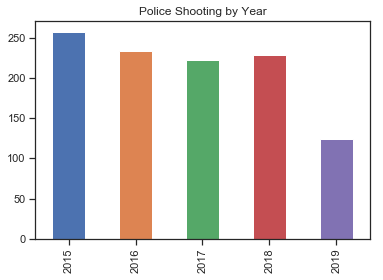

In [238]:
#police shootings by year, filtered to African Americans
df_B= df.loc[df['race'] == "B"]

year_vals_B = df_B.year.value_counts().sort_index()

(year_vals_B).plot(kind="bar");
plt.title("Police Shooting by Year");

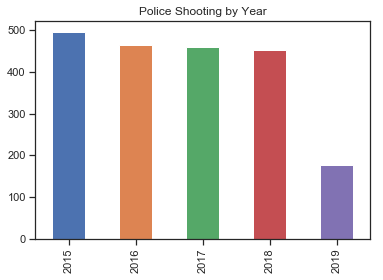

In [239]:
#police shootings by year, filtered to White people
df_W= df.loc[df['race'] == "W"]

year_vals_W = df_W.year.value_counts().sort_index()

(year_vals_W).plot(kind="bar");
plt.title("Police Shooting by Year");

In [240]:
#Dropping rows that do not have a race value
df2= df.dropna(subset=['race'], how='any')

In [241]:
#Dropping all na
df3= df2.dropna()

In [242]:
#Dropping columns that are not valuable usefull for the analysis
df4= df3.drop(['name','date','manner_of_death','id','state'],axis=1)

In [243]:
#Seeing what all is in the armed column by creating a dataframe
armed_df = df4.armed.unique()

In [244]:
armed_df

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'shovel',
       'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'chair',
       'pitchfork', 'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', '

In [245]:
#I've decided to condence this column down to armed and unarmed. First I am creating a df for anything other than armed. 
armed_df= armed_df[armed_df != "unarmed"]

In [246]:
armed_df

array(['gun', 'toy weapon', 'nail gun', 'knife', 'shovel', 'hammer',
       'hatchet', 'undetermined', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'chair',
       'pitchfork', 'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'pipe', 'bas

In [247]:
#Now I am replacing all of the armed df with just armed.
df4 = df4.replace(armed_df, "armed")

In [248]:
df4.head()

,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,year
0,armed,53.0,M,A,Shelton,True,attack,Not fleeing,False,2015
1,armed,47.0,M,W,Aloha,False,attack,Not fleeing,False,2015
2,unarmed,23.0,M,H,Wichita,False,other,Not fleeing,False,2015
3,armed,32.0,M,W,San Francisco,True,attack,Not fleeing,False,2015
4,armed,39.0,M,H,Evans,False,attack,Not fleeing,False,2015


### Shootings by Ethnicty

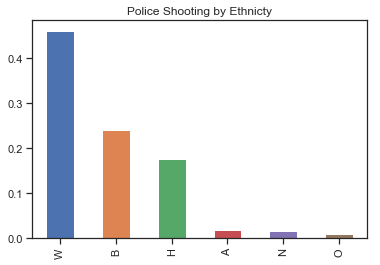

In [249]:
#Plotting shootings by ethnicity

ethnicity_vals = df2.race.value_counts()

(ethnicity_vals/df.shape[0]).plot(kind="bar");
plt.title("Police Shooting by Ethnicty");

In [250]:
ethnicity_vals_percent = pd.DataFrame(ethnicity_vals/df.shape[0])
ethnicity_vals_percent.insert(1, "Population", [.61, .12, .18, .05, .013, .007], True) 

ethnicity_vals_percent

,race,Population
W,0.460139,0.610
B,0.239838,0.120
H,0.174938,0.180
A,0.016843,0.050
N,0.016169,0.013
O,0.008983,0.007


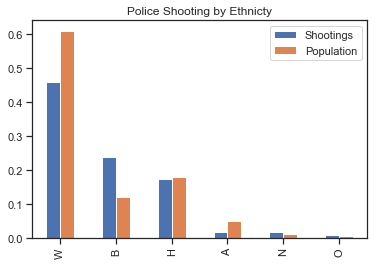

In [251]:
ethnicity_vals_percent.plot(kind="bar");
plt.title("Police Shooting by Ethnicty");
plt.legend(('Shootings','Population'))

In [252]:
df_filtered_rows = df4.query('threat_level != "attack"') 
df_filtered_rows = df_filtered_rows.query('threat_level != "armed"') 
df_filtered_rows = df_filtered_rows.query('armed != "armed"') 
df_filtered_rows = df_filtered_rows.query('flee == "Not fleeing"') 

df_filtered_rows

,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee,body_camera,year
2,unarmed,23.0,M,H,Wichita,False,other,Not fleeing,False,2015
8,unarmed,34.0,F,W,Burlington,False,other,Not fleeing,True,2015
86,unarmed,28.0,M,H,Tempe,False,other,Not fleeing,False,2015
107,unarmed,35.0,M,H,Reading,False,other,Not fleeing,False,2015
112,unarmed,25.0,M,B,Miami Gardens,True,other,Not fleeing,False,2015
125,unarmed,31.0,M,H,Euless,False,other,Not fleeing,False,2015
132,unarmed,39.0,M,W,Omaha,False,other,Not fleeing,False,2015
140,unarmed,31.0,M,W,Terre Haute,False,other,Not fleeing,False,2015
143,unarmed,49.0,M,W,Gulfport,False,other,Not fleeing,False,2015
159,unarmed,26.0,M,W,Deltona,False,other,Not fleeing,False,2015


In [253]:
ethnicity_vals2 = df_filtered_rows.race.value_counts()

ethnicity_vals_percent2 = pd.DataFrame(ethnicity_vals2/df_filtered_rows.shape[0])
ethnicity_vals_percent2.insert(1, "Population", [.61, .125, .18, .007, .05], True) 

ethnicity_vals_percent2

,race,Population
W,0.462687,0.610
B,0.298507,0.125
H,0.179104,0.180
O,0.044776,0.007
A,0.014925,0.050


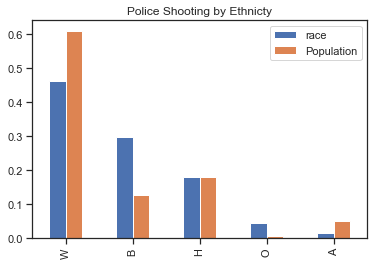

In [254]:
ethnicity_vals_percent2.plot(kind="bar");
plt.title("Police Shooting by Ethnicty");

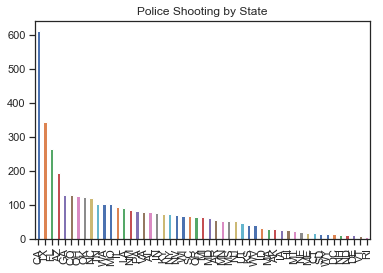

In [255]:
#I am curious where these shootings are most often occuring
state_vals = df2.state.value_counts()

(state_vals).plot(kind="bar");
plt.title("Police Shooting by State");

# Clustering

In [256]:
#Dropping columns that are not valuable usefull for the analysis
df4= df4.drop(['city'],axis=1)

In [257]:
cat_df = df4.select_dtypes(include=['object'])
cat_df.shape[1]

5

In [258]:
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):

    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [259]:
cat_df = df4.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df4, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(3644, 16)


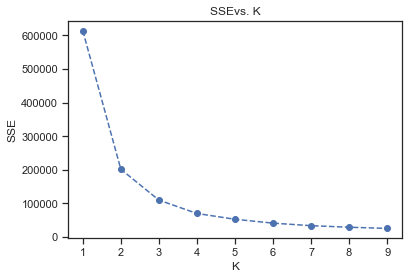

In [260]:
def get_kmeans_score(data, center):
    kmeans=KMeans(n_clusters=center)
    model = kmeans.fit(df_new)
    score = np.abs(model.score(df_new))
    return score

scores = []
centers = list(range(1,10))

for center in centers:
    scores.append(get_kmeans_score(df_new, center))
    
plt.plot(centers, scores, linestyle = '--', marker = 'o', color = 'b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSEvs. K');

In [261]:
kmeans = KMeans(4)
model = kmeans.fit(df_new)
labels = model.predict(df_new)


In [262]:
#h.plot_data(df_new, labels)

In [263]:
df_new1 = df_new[labels == 1]

In [264]:
df_new1.describe()

,age,year,armed_unarmed,gender_M,race_B,race_H,race_N,race_O,race_W,threat_level_attack,threat_level_other,flee_Foot,flee_Not fleeing,flee_Other
count,381.000000,381.000000,381.00000,381.000000,381.000000,381.000000,381.0,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,61.868766,2016.724409,0.03937,0.963255,0.131234,0.086614,0.0,0.002625,0.761155,0.713911,0.259843,0.041995,0.895013,0.007874
std,6.429668,1.311952,0.19473,0.188383,0.338100,0.281639,0.0,0.051232,0.426939,0.452526,0.439125,0.200841,0.306940,0.088502
min,55.000000,2015.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,2016.000000,0.00000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,60.000000,2017.000000,0.00000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,65.000000,2018.000000,0.00000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,91.000000,2019.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [265]:
df_new1 = df_new[labels == 3]

In [266]:
df_new1.describe()

,age,year,armed_unarmed,gender_M,race_B,race_H,race_N,race_O,race_W,threat_level_attack,threat_level_other,flee_Foot,flee_Not fleeing,flee_Other
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,47.483400,2016.677291,0.047809,0.942895,0.156707,0.144754,0.013280,0.010624,0.654714,0.657371,0.316069,0.091633,0.775564,0.026560
std,3.624687,1.327182,0.213503,0.232197,0.363765,0.352087,0.114548,0.102593,0.475777,0.474904,0.465249,0.288700,0.417487,0.160902
min,42.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,2015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,47.000000,2017.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,50.000000,2018.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,54.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [267]:
#Create data set with mean on each column for each label.
df_label_1 = pd.DataFrame(df_new[labels ==3].mean(axis=0) )
df_label_1.insert(1, "Label1", df_new[labels ==1].mean(axis=0), True)
df_label_1.insert(1, "Label2", df_new[labels ==2].mean(axis=0), True)
df_label_1

,0,Label2,Label1
age,47.483400,35.044409,61.868766
signs_of_mental_illness,0.273572,0.245044,0.349081
body_camera,0.103586,0.116574,0.115486
year,2016.677291,2016.734338,2016.724409
armed_unarmed,0.047809,0.073751,0.039370
gender_M,0.942895,0.954798,0.963255
race_B,0.156707,0.266455,0.131234
race_H,0.144754,0.203807,0.086614
race_N,0.013280,0.021412,0.000000
race_O,0.010624,0.007137,0.002625


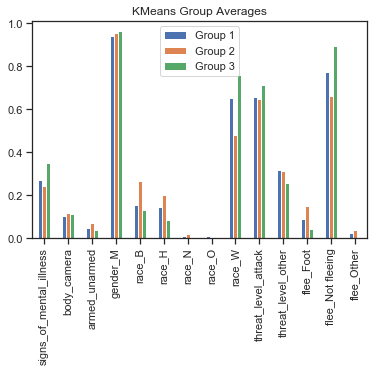

In [268]:
#Plot the mean for each label
df_label_1= df_label_1.drop(['year','age'],axis=0)

df_label_1.plot(kind="bar");
plt.title("KMeans Group Averages");
plt.legend(('Group 1','Group 2','Group 3'))

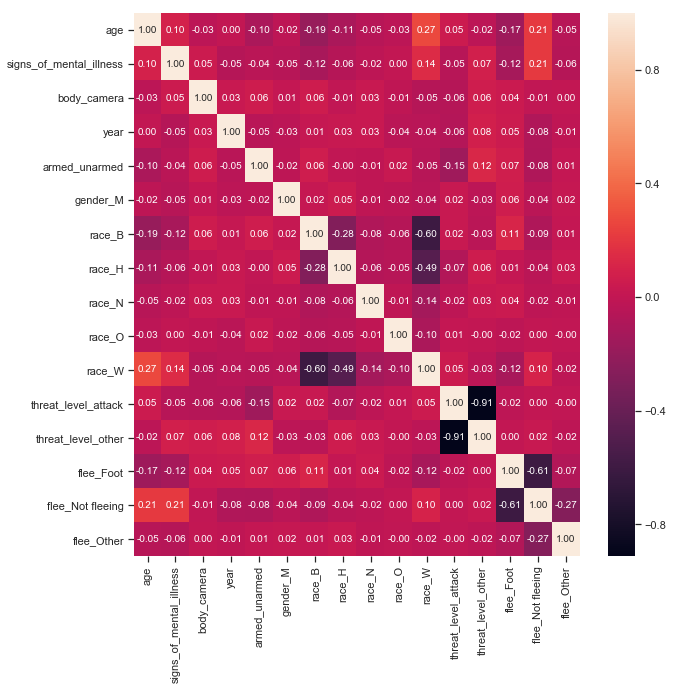

In [269]:
#Correlation plot on cleaned data
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True, fmt='.2f');